# Обычный автоэкодер

Эпоха 0, Ошибка (MSE): 0.064376
Эпоха 1, Ошибка (MSE): 0.059118
Эпоха 2, Ошибка (MSE): 0.051279
Эпоха 3, Ошибка (MSE): 0.044988
Эпоха 4, Ошибка (MSE): 0.040504
Эпоха 5, Ошибка (MSE): 0.037359
Эпоха 6, Ошибка (MSE): 0.035008
Эпоха 7, Ошибка (MSE): 0.032904
Эпоха 8, Ошибка (MSE): 0.031155
Эпоха 9, Ошибка (MSE): 0.029893
Эпоха 10, Ошибка (MSE): 0.028277
Эпоха 11, Ошибка (MSE): 0.027183
Эпоха 12, Ошибка (MSE): 0.025932
Эпоха 13, Ошибка (MSE): 0.024949
Эпоха 14, Ошибка (MSE): 0.023941
Эпоха 15, Ошибка (MSE): 0.022966
Эпоха 16, Ошибка (MSE): 0.022170
Эпоха 17, Ошибка (MSE): 0.021389
Эпоха 18, Ошибка (MSE): 0.020755
Эпоха 19, Ошибка (MSE): 0.019956
Эпоха 20, Ошибка (MSE): 0.019241
Эпоха 21, Ошибка (MSE): 0.018672
Эпоха 22, Ошибка (MSE): 0.018159
Эпоха 23, Ошибка (MSE): 0.017612
Эпоха 24, Ошибка (MSE): 0.016984
Эпоха 25, Ошибка (MSE): 0.016560
Эпоха 26, Ошибка (MSE): 0.016091
Эпоха 27, Ошибка (MSE): 0.015623
Эпоха 28, Ошибка (MSE): 0.015381
Эпоха 29, Ошибка (MSE): 0.014820
Эпоха 30, Ошибка (MS

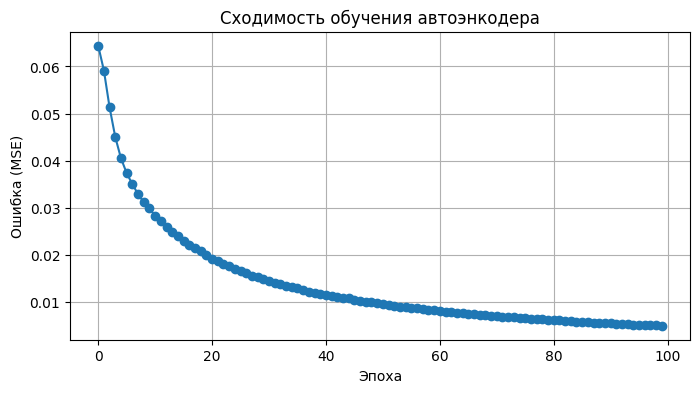

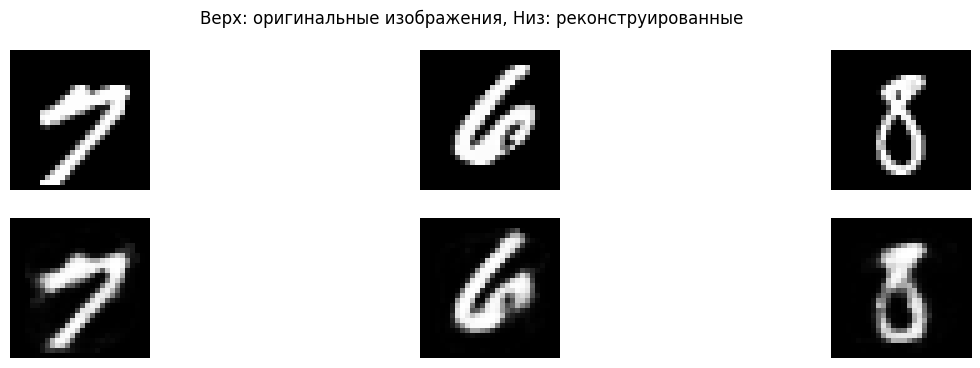

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def sigmoid(x):
    """Сигмоида как нелинейная функция активации."""
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    """Производная сигмоиды (через значение сигмоиды)."""
    s = sigmoid(x)
    return s * (1 - s)

def load_full_mnist():
    """
    Загрузка полного набора MNIST.
    Первые 784 столбца – признаки (значения пикселей, нормированные к диапазону [0,1]),
    последний столбец – метки классов.
    """
    df = pd.read_csv('mnist_784.csv')
    X = df.iloc[:, :784].values / 255.0  # нормализация
    y = df.iloc[:, 784].values
    return X, y

# Загрузка данных MNIST
X, y = load_full_mnist()
X = X[:1000]
y = y[:1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_size = 784        # размерность входного вектора (28x28 изображение)
hidden_size = 300        # размер скрытого представления (код)
learning_rate = 1e-2    # скорость обучения
num_epochs = 100       # число эпох обучения
batch_size = 50        # размер мини-батча

W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, input_size) * 0.01
b2 = np.zeros((1, input_size))

# Функция прямого распространения
def forward(X):
    """
    Вычисляет выходы автоэнкодера:
      z1 = X*W1 + b1, h = sigmoid(z1)
      z2 = h*W2 + b2, output = sigmoid(z2)
    """
    z1 = np.dot(X, W1) + b1
    h = sigmoid(z1)
    z2 = np.dot(h, W2) + b2
    output = sigmoid(z2)
    return z1, h, z2, output

losses = []

# Обучение автоэнкодера
for epoch in range(num_epochs):
    idx = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[idx]
    
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        
        # Прямое распространение
        z1, h, z2, output = forward(X_batch)
                
        # Обратное распространение ошибки
        output_error = (output - X_batch) * sigmoid_deriv(z2)
        dW2 = np.dot(h.T, output_error)
        db2 = np.sum(output_error, axis=0, keepdims=True)
        
        h_error = np.dot(output_error, W2.T) * sigmoid_deriv(z1)
        dW1 = np.dot(X_batch.T, h_error)
        db1 = np.sum(h_error, axis=0, keepdims=True)
        
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    if epoch % 1 == 0:
        _, _, _, output_train = forward(X_train)
        train_loss = np.mean((X_train - output_train)**2)
        losses.append(train_loss)
        print(f"Эпоха {epoch}, Ошибка (MSE): {train_loss:.6f}")

# Визуализация сходимости обучения
plt.figure(figsize=(8, 4))
plt.plot(range(0, num_epochs, 1), losses, marker='o')
plt.xlabel("Эпоха")
plt.ylabel("Ошибка (MSE)")
plt.title("Сходимость обучения автоэнкодера")
plt.grid(True)
plt.show()

num_display = 3
_, h_test, _, output_test = forward(X_test)

fig, axes = plt.subplots(2, num_display, figsize=(15, 4))
for i in range(num_display):
    axes[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(output_test[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
    
plt.suptitle("Верх: оригинальные изображения, Низ: реконструированные")
plt.show()

# Спайковый автоэнкодер

Эпоха 1 завершена, MSE: 0.030712831964575832
Эпоха 2 завершена, MSE: 0.030689990370279297
Эпоха 3 завершена, MSE: 0.03068973169651764
Эпоха 4 завершена, MSE: 0.03068829005701064
Эпоха 5 завершена, MSE: 0.030688030898251725
Эпоха 6 завершена, MSE: 0.03068662014559297
Эпоха 7 завершена, MSE: 0.03068636049473491
Эпоха 8 завершена, MSE: 0.030686100601178337
Эпоха 9 завершена, MSE: 0.030665115075630127
Эпоха 10 завершена, MSE: 0.03066541661117033
Эпоха 11 завершена, MSE: 0.030664004784528246
Эпоха 12 завершена, MSE: 0.03066374389100705
Эпоха 13 завершена, MSE: 0.030663482753897228
Эпоха 14 завершена, MSE: 0.030663221373017673
Эпоха 15 завершена, MSE: 0.030662959748187175
Эпоха 16 завершена, MSE: 0.030645151295543842
Эпоха 17 завершена, MSE: 0.030585410528835958
Эпоха 18 завершена, MSE: 0.03058514785234186
Эпоха 19 завершена, MSE: 0.030584884931062997
Эпоха 20 завершена, MSE: 0.030584621764817473
Эпоха 21 завершена, MSE: 0.03058435835342324
Эпоха 22 завершена, MSE: 0.03058409469669816
Эпоха 

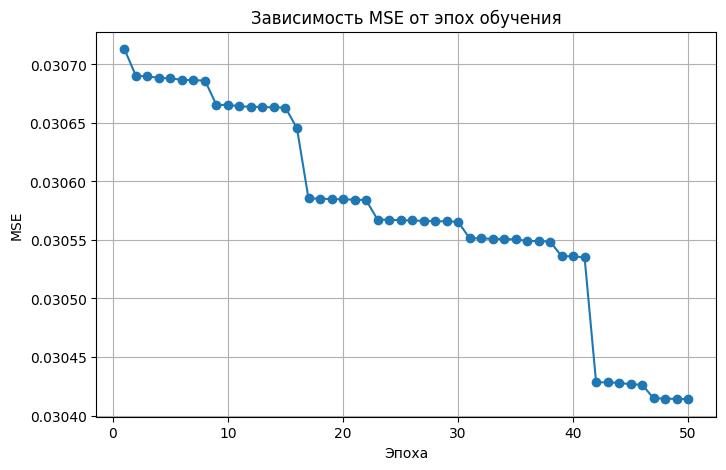

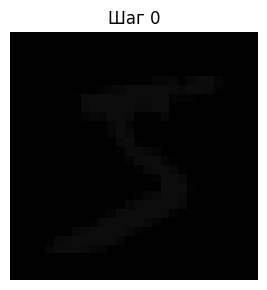

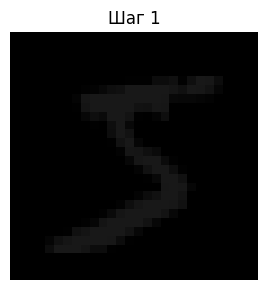

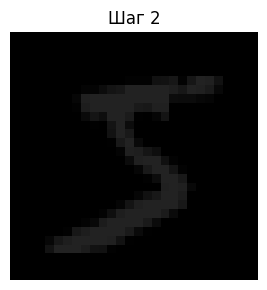

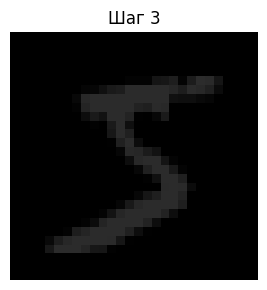

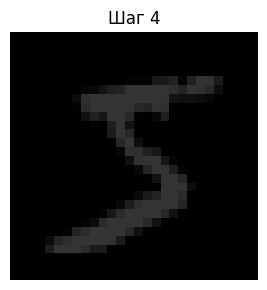

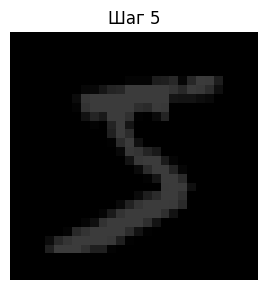

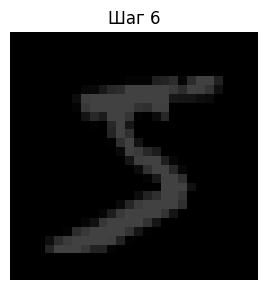

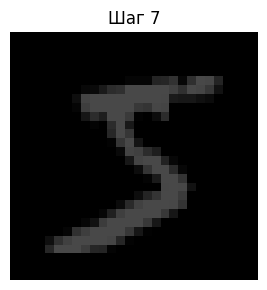

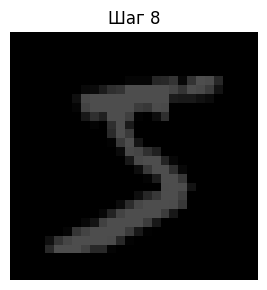

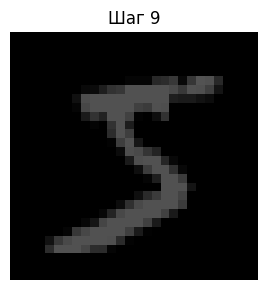

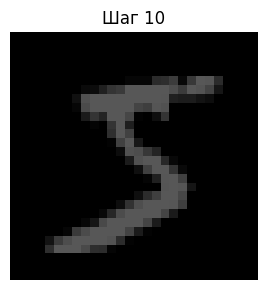

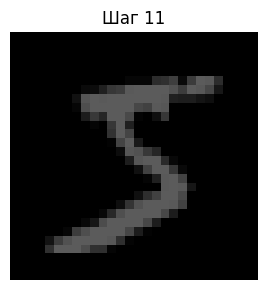

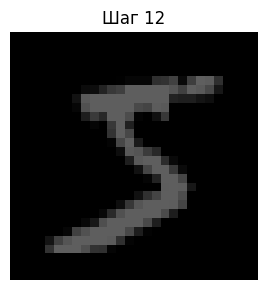

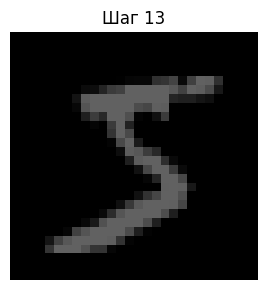

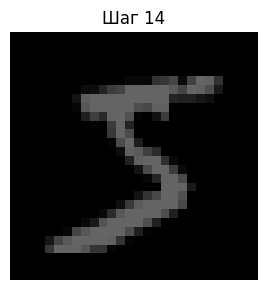

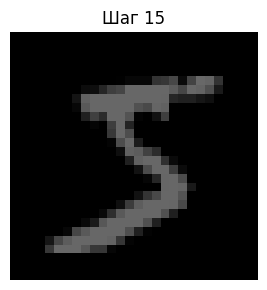

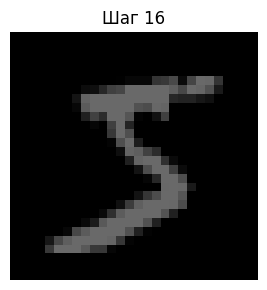

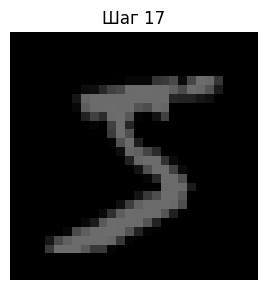

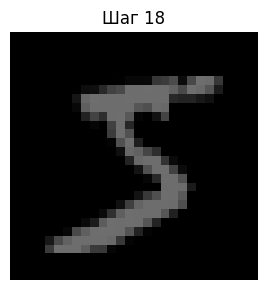

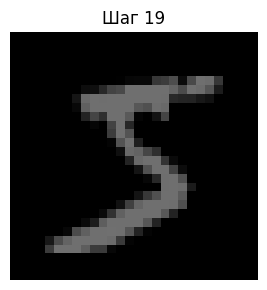

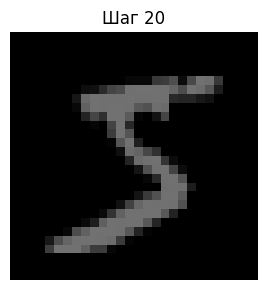

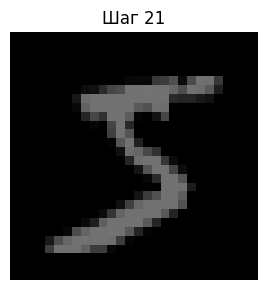

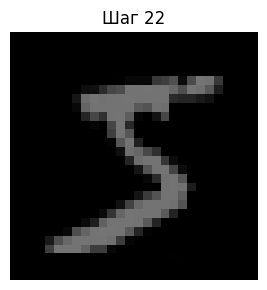

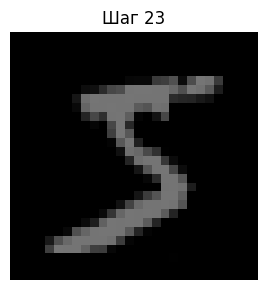

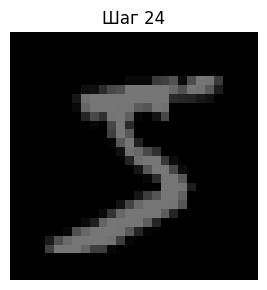

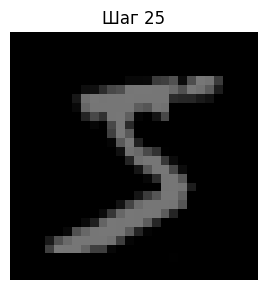

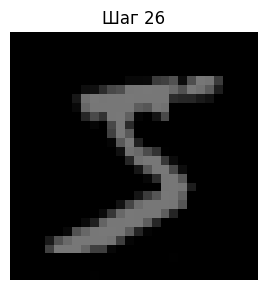

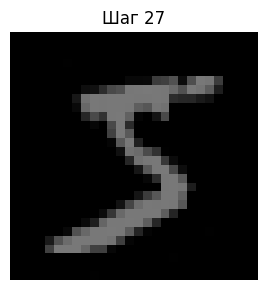

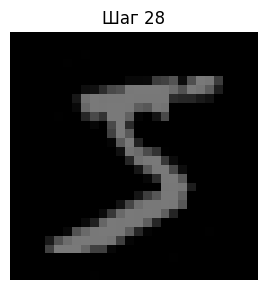

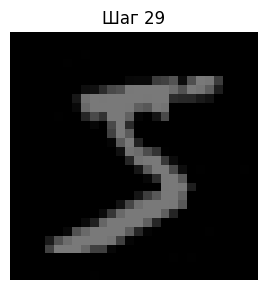

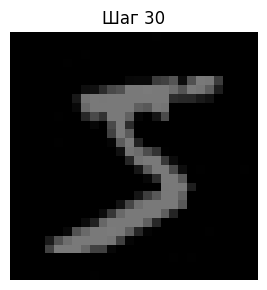

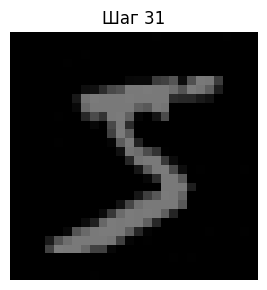

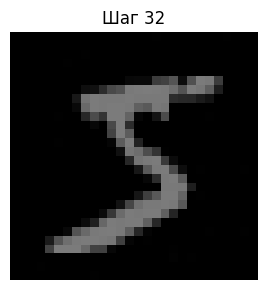

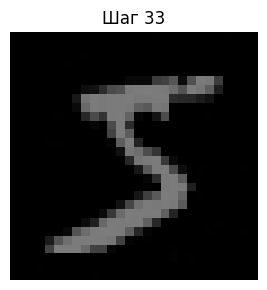

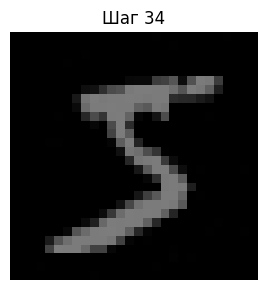

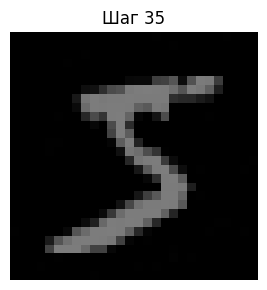

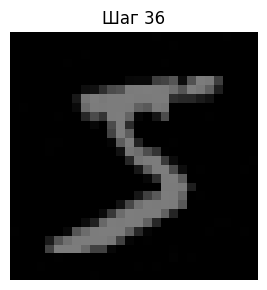

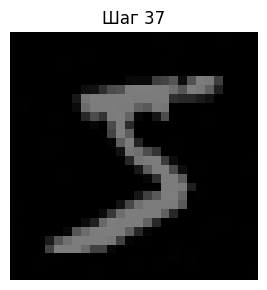

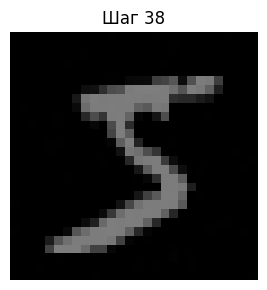

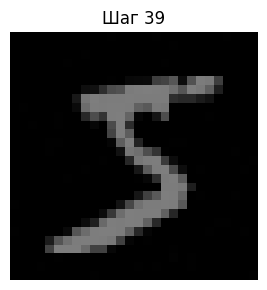

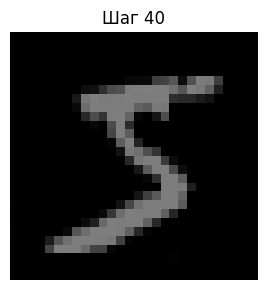

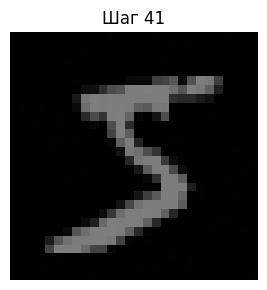

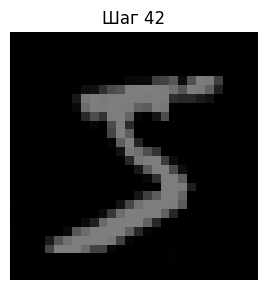

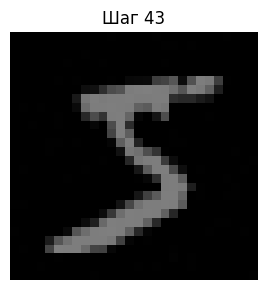

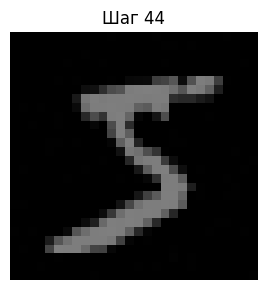

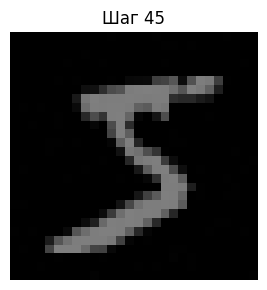

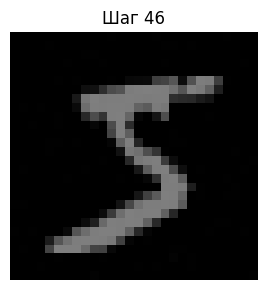

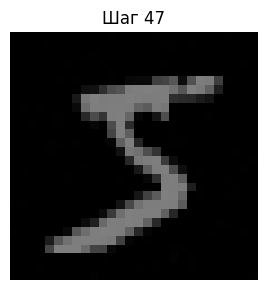

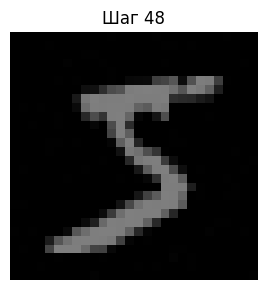

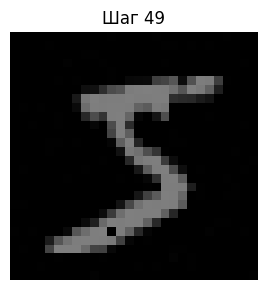

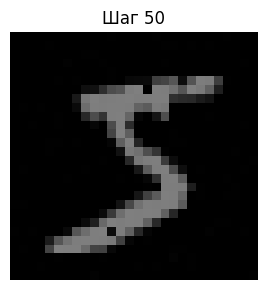

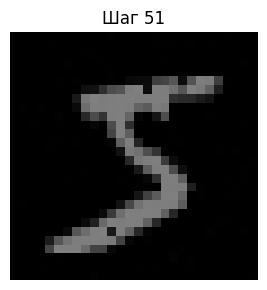

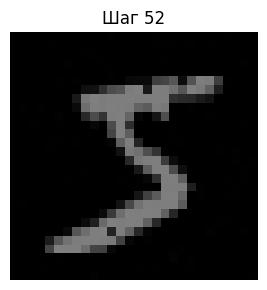

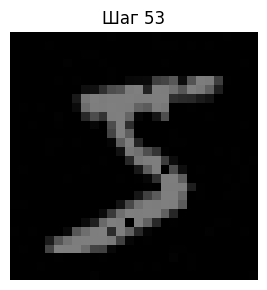

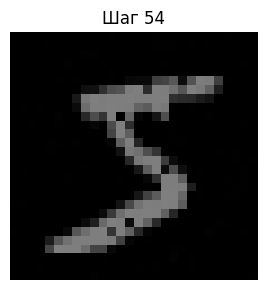

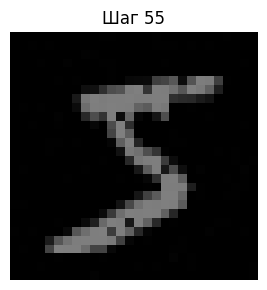

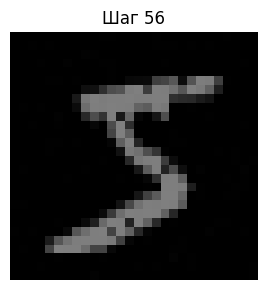

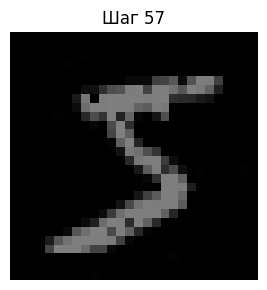

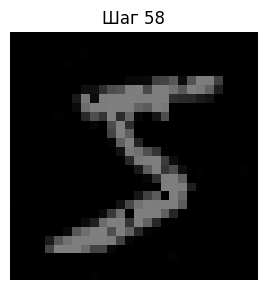

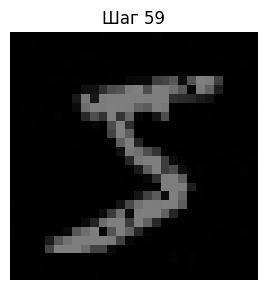

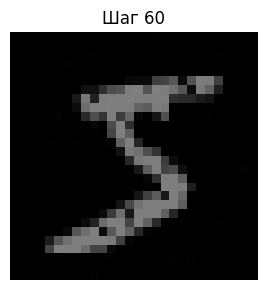

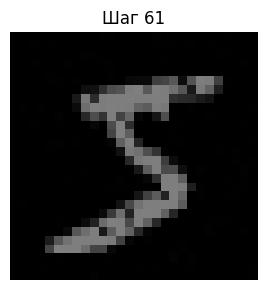

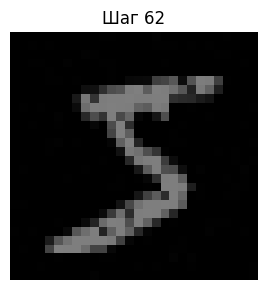

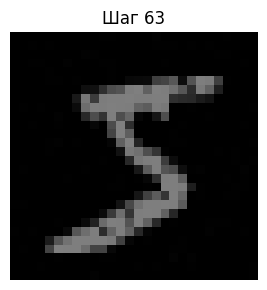

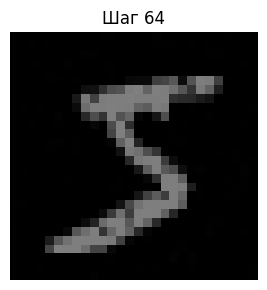

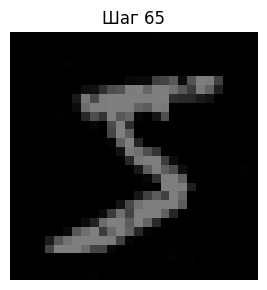

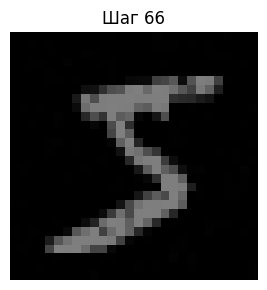

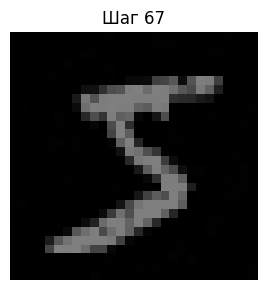

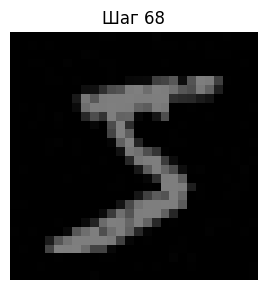

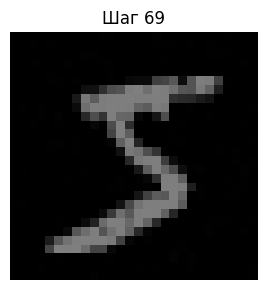

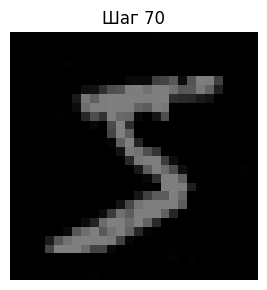

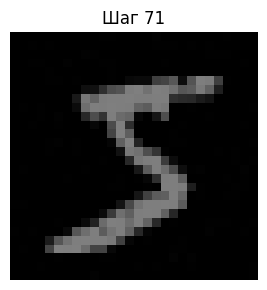

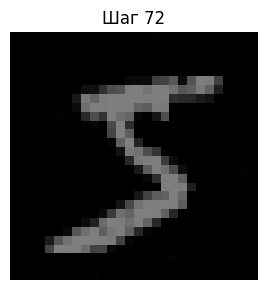

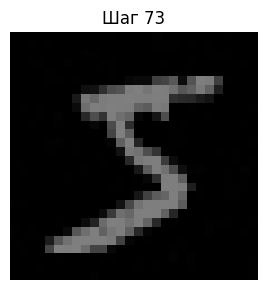

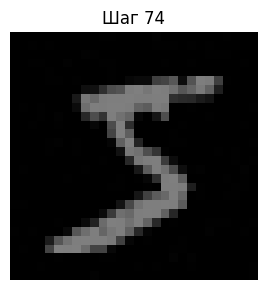

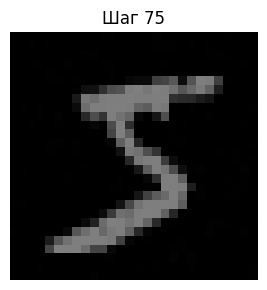

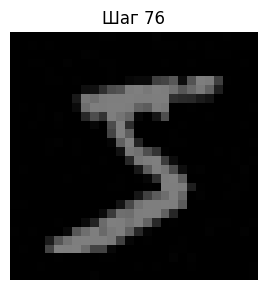

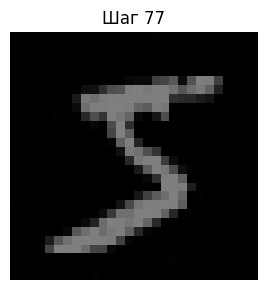

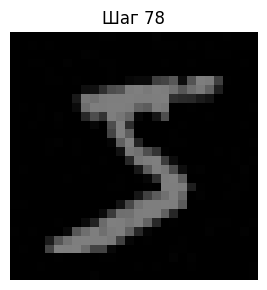

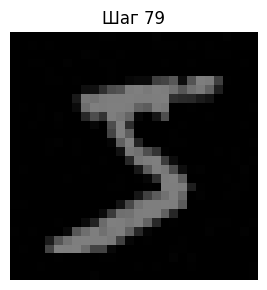

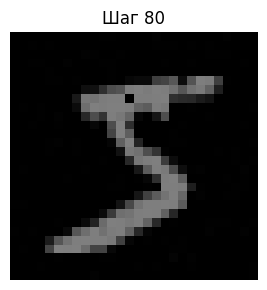

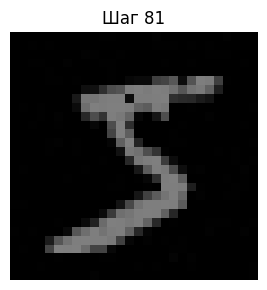

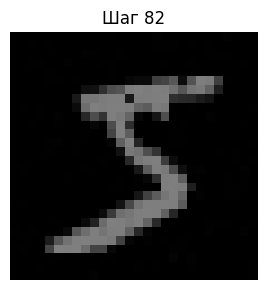

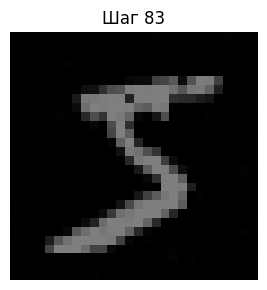

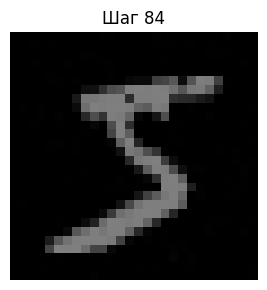

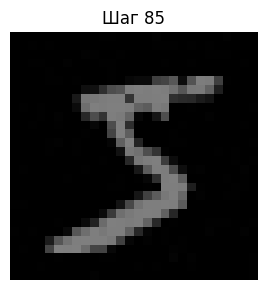

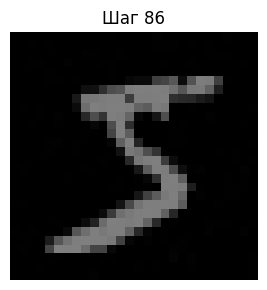

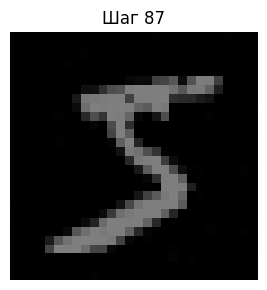

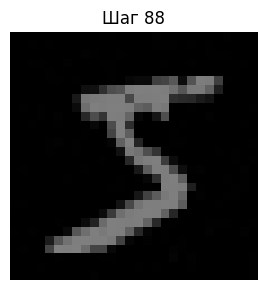

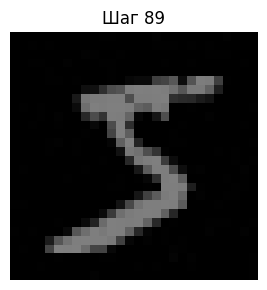

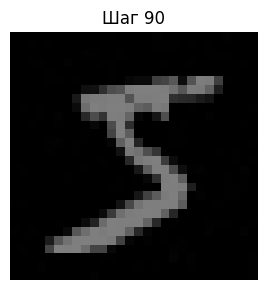

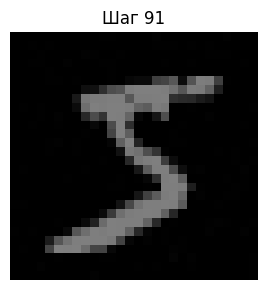

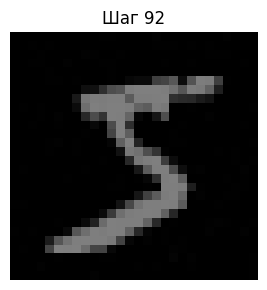

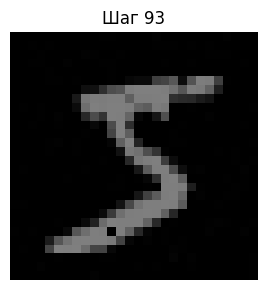

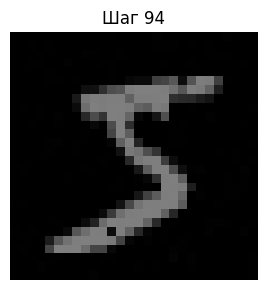

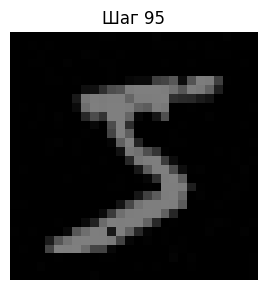

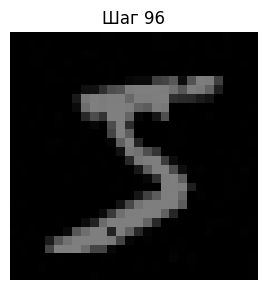

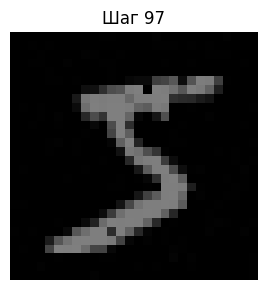

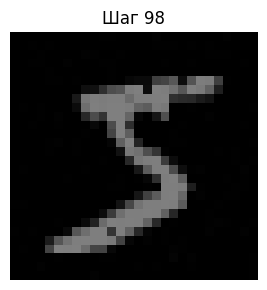

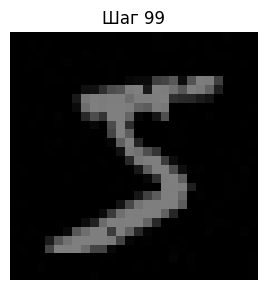

GIF сохранён как reconstruction_0.gif


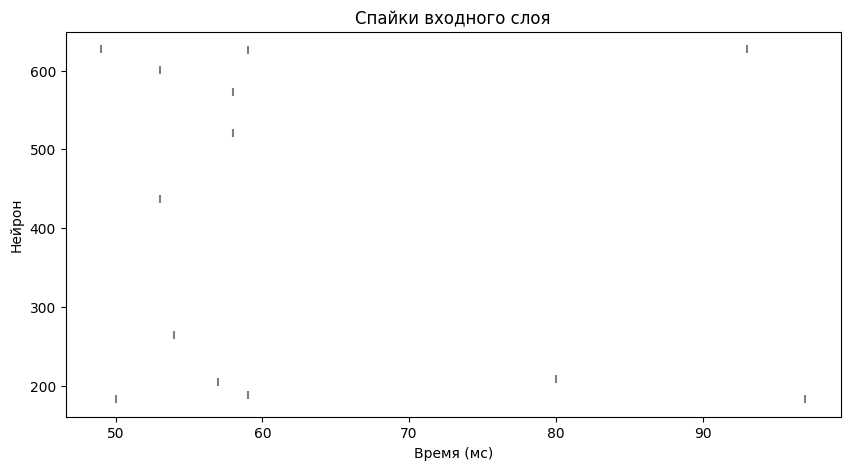

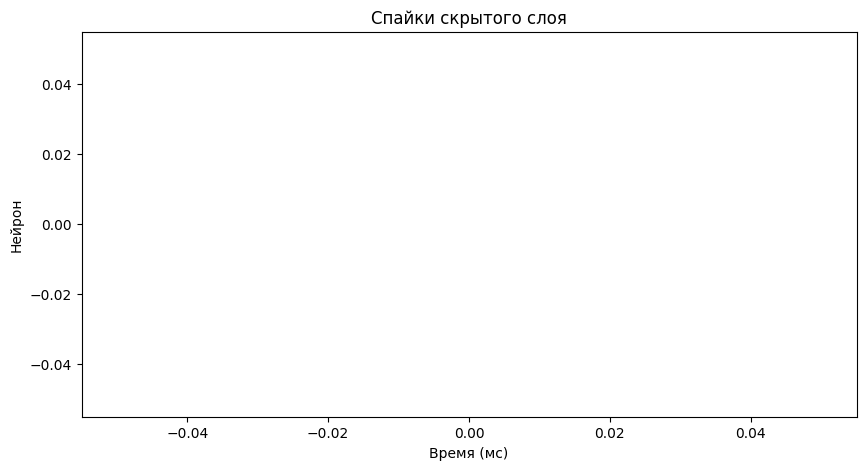

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import pandas as pd

# ==========================
# ПАРАМЕТРЫ СЕТИ И ДАННЫЕ
# ==========================
def load_mnist_subset(limit=1000):
    """Загрузка подмножества MNIST."""
    df = pd.read_csv('mnist_784.csv')
    X = df.iloc[:, :784].values / 255.0
    y = df.iloc[:, 784].values
    return X[:limit], y[:limit]

X_data, y_data = load_mnist_subset(limit=1)
N_data = X_data.shape[0]
N_input = 784
N_hidden = 300

tau = 0.02       # 20 ms в секундах
dt = 0.001       # 1 ms
eta = 1e-4       # Скорость обучения
decay = 1e-3     # Коэффициент затухания весов
threshold_in = 0.5  # Порог входных нейронов
threshold_hid = 0.3 # Порог скрытых нейронов
steps_per_sample = int(0.1 / dt)  # 100 шагов на образец (100 мс)

# Инициализация весов
rng = np.random.default_rng(seed=42)
w_in_hidden = rng.normal(0, 0.01, size=(N_input, N_hidden))
w_hidden_in = rng.normal(0, 0.01, size=(N_hidden, N_input))

# ==========================
# ФУНКЦИЯ СИМУЛЯЦИИ ОБРАЗЦА
# ==========================
def simulate_one_sample(image_vector, do_learn=True):
    global w_in_hidden, w_hidden_in
    
    v_in = np.zeros(N_input)
    v_hid = np.zeros(N_hidden)
    
    spikes_in = np.zeros((steps_per_sample, N_input), dtype=int)
    spikes_hid = np.zeros((steps_per_sample, N_hidden), dtype=int)
    v_in_hist = np.zeros((steps_per_sample, N_input))
    v_hid_hist = np.zeros((steps_per_sample, N_hidden))
    
    for t in range(steps_per_sample):
        # Обратная связь от скрытого слоя к входному
        V_feedback = w_hidden_in.T @ v_hid
        
        # Обновление входных нейронов
        dv_in = (-v_in + (image_vector - v_in + V_feedback)) / tau
        v_in_new = v_in + dt * dv_in
        
        # Проверка порога и сброс
        spiked_in = v_in_new >= threshold_in
        spikes_in[t] = spiked_in.astype(int)
        v_in_new[spiked_in] = 0.0
        
        # Обновление скрытых нейронов
        V_input = w_in_hidden.T @ v_in
        dv_hid = (-v_hid + V_input) / tau
        v_hid_new = v_hid + dt * dv_hid
        
        spiked_hid = v_hid_new >= threshold_hid
        spikes_hid[t] = spiked_hid.astype(int)
        v_hid_new[spiked_hid] = 0.0
        
        # Обновление весов
        if do_learn:
            # Веса вход -> скрытый
            delta_w_in = np.outer(v_in, v_hid) * dt * eta
            decay_term = w_in_hidden * decay * dt * eta
            w_in_hidden += delta_w_in - decay_term
            
            # Веса скрытый -> вход
            delta_w_hid = np.outer(v_hid, v_in) * dt * eta
            decay_term_hid = w_hidden_in * decay * dt * eta
            w_hidden_in += delta_w_hid - decay_term_hid
        
        # Сохранение состояний
        v_in = v_in_new.copy()
        v_hid = v_hid_new.copy()
        v_in_hist[t] = v_in
        v_hid_hist[t] = v_hid
    
    return {
        'v_in_hist': v_in_hist,
        'v_hid_hist': v_hid_hist,
        'spikes_in': spikes_in,
        'spikes_hid': spikes_hid
    }

# ==========================
# ОБУЧЕНИЕ СЕТИ
# ==========================
num_epochs = 50
mse_values = []

for epoch in range(num_epochs):
    indices = np.random.permutation(N_data)
    for i in indices:
        img = X_data[i]
        simulate_one_sample(img, do_learn=True)
    
    # Оценка качества реконструкции для первого образца
    logs = simulate_one_sample(X_data[0], do_learn=True)
    # Используем состояние входного слоя на последнем шаге как реконструкцию
    reconstructed = logs['v_in_hist'][-1]
    mse = np.mean((X_data[0] - reconstructed)**2)
    mse_values.append(mse)
    
    print(f"Эпоха {epoch+1} завершена, MSE: {mse}")

# Построение графика MSE
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs+1), mse_values, marker='o')
plt.xlabel("Эпоха")
plt.ylabel("MSE")
plt.title("Зависимость MSE от эпох обучения")
plt.grid(True)
plt.show()
# ==========================
# ВИЗУАЛИЗАЦИЯ РЕКОНСТРУКЦИИ
# ==========================
def create_reconstruction_animation(sample_idx):
    logs = simulate_one_sample(X_data[sample_idx], do_learn=False)
    v_in_hist = logs['v_in_hist']
    
    frames = []
    for t in range(steps_per_sample):
        plt.figure(figsize=(3,3))
        recon = v_in_hist[t].reshape(28, 28)
        plt.imshow(recon, cmap='gray', vmin=0, vmax=1)
        plt.title(f"Шаг {t}")
        plt.axis('off')
        plt.tight_layout()
        
        # Сохранение кадра
        plt.draw()
        img = np.array(plt.gcf().canvas.renderer.buffer_rgba())
        frames.append(img[:, :, :3])
        plt.show()
    
    # Сохранение GIF
    gif_path = f'reconstruction_{sample_idx}.gif'
    imageio.mimsave(gif_path, frames, duration=50)
    print(f"GIF сохранён как {gif_path}")

create_reconstruction_animation(0)

# ==========================
# ВИЗУАЛИЗАЦИЯ СПАЙКОВ
# ==========================
def plot_spikes(spikes, title):
    times, neurons = np.where(spikes)
    plt.figure(figsize=(10, 5))
    plt.scatter(times * dt * 1000, neurons, marker='|', color='k', alpha=0.5)
    plt.title(title)
    plt.xlabel('Время (мс)')
    plt.ylabel('Нейрон')
    plt.show()

# Симуляция для визуализации спайков
logs = simulate_one_sample(X_data[0], do_learn=False)
plot_spikes(logs['spikes_in'], 'Спайки входного слоя')
plot_spikes(logs['spikes_hid'], 'Спайки скрытого слоя')